# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#4 MMSE, Linear regression, and Logistic regression</center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='blue'> MMSE

---

Refer class note



## <font color='red'> 1. Find the minimum mean squared error (MMSE) on following data.

In [322]:
y = [11,20,19,17,10]
y_bar = [12,18,19.5,18,9]

#write code here
sum=0
for i in range(len(y)):
    sum+=(y[i]-y_bar[i])**2
MSE=sum/len(y)
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  1.45


## <font color='red'> 2 Given a sample space $S_{XY}={(0,0),(1,1),(2,2),(2,3)}$, with equiprobable outcomes, i.e., $p(0,0)=p(1,1)=p(2,2)=p(2,3)=\frac{1}{4}$. Estimate $\hat{Y}$ given X.


$$\hat{Y}=E(Y)+\frac{COV(X,Y)}{VAR(X)}(X-E(X))$$

Also calculate the mean squared error between $\hat{Y}$ and $Y$.


Hint: You can use the classnotes for help.

In [323]:
#write code here
Sxy=np.array([[0,0],[1,1],[2,2],[2,3]])
p=0.25
Ex,Ey,Ex_square,Exy=0,0,0,0
for x,y in Sxy:
    Ex+=p*x
    Ey+=p*y
    Ex_square+=p*(x**2)
    Exy+=x*y*p
Var_x=Ex_square-(Ex**2)
Cov_xy=Exy-(Ex*Ey)
y_bar=[]
for x,y in Sxy:
    y_bar.append(Ey+(Cov_xy/Var_x)*(x-Ex))
sum=0

for x,y in zip(Sxy,y_bar):
    sum+=(x[1]-y)**2
MSE=sum/len(y_bar)
print("Y_hat is ",y_bar)
print("Mean square error is ",MSE)

Y_hat is  [-0.09090909090909083, 1.1818181818181819, 2.4545454545454546, 2.4545454545454546]
Mean square error is  0.13636363636363635


## <font color='blue'> Linear regression

---

Refer class note



## <font color='red'> 3. Perform linear regression on the given dataset and observe underfitting and overfitting capacity of the function.

In [324]:
#example of dataset:

no_samples = 10

#Generate n = np.random.rand(no_samples) # Here data is zero mean
#Generate x between 0 and 2 using number of smaples

#Generate function y dependent on x and n: y = x**2+2*n

n = np.random.rand(no_samples)
x=np.arange(0,2,2/no_samples)
y=[]
y=x**2+2*n
print(n,x,y)

[0.7478077  0.52969572 0.07977086 0.37446357 0.35399524 0.75517364
 0.37880436 0.97644262 0.88296761 0.23439882] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8] [1.49561541 1.09939144 0.31954172 1.10892714 1.34799048 2.51034729
 2.19760872 3.91288524 4.32593522 3.70879764]


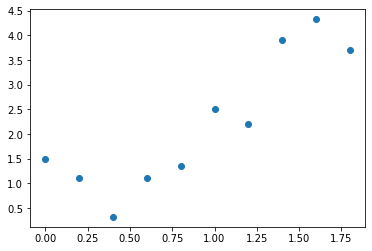

In [325]:
# code to scatter plot x and y
plt.scatter(x,y)


#### Hint: Pseudo inverse
 $$Y = W^TX$$
 $$W = (X^TX)^{-1}X^TY$$ 

1. Take $y = \theta_0 + \theta_1 x$

In [326]:
#Generate X1 by concatinating ones and x as shown in output
X1=[]
for i in x:
    X1.append([1,i])
W1=np.linalg.pinv(X1).dot(y)
#Find W1 using pseudo inverse
print(X1)
print(W1)

[[1, 0.0], [1, 0.2], [1, 0.4], [1, 0.6000000000000001], [1, 0.8], [1, 1.0], [1, 1.2000000000000002], [1, 1.4000000000000001], [1, 1.6], [1, 1.8]]
[0.43271587 1.96665351]


2. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4+\theta_5 x^5$

In [327]:
#Generate X2 by concatinating ones,x,x**2,x**3,x**4,x**5 

#Generate W2 using: W2= la.inv(X2.T@X2)@X2.T@y

X2=[]
for i in x:
        X2.append([1,i,i**2,i**3,i**4,i**5])
W2=np.linalg.pinv(X2).dot(y)
print(X2)
print(W2)

[[1, 0.0, 0.0, 0.0, 0.0, 0.0], [1, 0.2, 0.04000000000000001, 0.008000000000000002, 0.0016000000000000003, 0.0003200000000000001], [1, 0.4, 0.16000000000000003, 0.06400000000000002, 0.025600000000000005, 0.010240000000000003], [1, 0.6000000000000001, 0.3600000000000001, 0.2160000000000001, 0.12960000000000008, 0.07776000000000005], [1, 0.8, 0.6400000000000001, 0.5120000000000001, 0.4096000000000001, 0.3276800000000001], [1, 1.0, 1.0, 1.0, 1.0, 1.0], [1, 1.2000000000000002, 1.4400000000000004, 1.7280000000000009, 2.073600000000001, 2.4883200000000016], [1, 1.4000000000000001, 1.9600000000000004, 2.7440000000000007, 3.8416000000000015, 5.378240000000003], [1, 1.6, 2.5600000000000005, 4.096000000000001, 6.553600000000001, 10.485760000000003], [1, 1.8, 3.24, 5.832000000000001, 10.4976, 18.895680000000002]]
[  1.57275171  -7.03579397  19.56183748 -23.53675326  15.19353931
  -3.74580842]


3. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 $

In [328]:
#Generate X3 by concatinating ones,x,x**2 

#Generate W3 using: W2= la.inv(X3.T@X3)@X3.T@y

X3=[]
for i in x:
        X3.append([1,i,i**2])
W3=np.linalg.pinv(X3).dot(y)
print(X3)
print(W3)

[[1, 0.0, 0.0], [1, 0.2, 0.04000000000000001], [1, 0.4, 0.16000000000000003], [1, 0.6000000000000001, 0.3600000000000001], [1, 0.8, 0.6400000000000001], [1, 1.0, 1.0], [1, 1.2000000000000002, 1.4400000000000004], [1, 1.4000000000000001, 1.9600000000000004], [1, 1.6, 2.5600000000000005], [1, 1.8, 3.24]]
[ 1.00052251 -0.16262139  1.1829305 ]


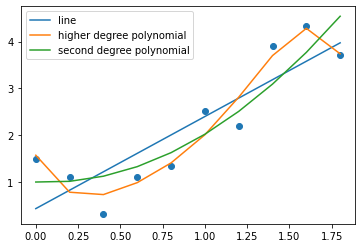

In [329]:
fig = plt.figure()
plt.scatter(x,y)

#Generate y_p1 = X1@W1
#Generate y_p2 = X2@W2
#Generate y_p3 = X3@W3


#Plot x,y_p1
#plot x,y_p2
#plot x,y_p3

y_p1=np.array(X1).dot(W1)
y_p2=np.array(X2).dot(W2)
y_p3=np.array(X3).dot(W3)
plt.plot(x,y_p1)
plt.plot(x,y_p2)
plt.plot(x,y_p3)
plt.legend(["line","higher degree polynomial","second degree polynomial"])

## <font color='blue'> Brief about **Gradient descent**:
---


Given a system $Ax=b$, we find $x$ for given observations $b$ and coeffiecient matrix $A$. When $b$ is not in column space of $A$, then $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$.

<br>
Linear least square is one of the methods to estimate $x$ by minimizing the mean square error as, $\min ||Ax-b||_2$. This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>


We will solve this by applying gradient descent algortithm on $f(x)$. 
<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>


Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new x iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

##  <font color='blue'> Logistic regression

---
Cost funcion for logistic regression,
$$
\begin{aligned}
J(\theta) &=\frac{1}{m} \sum_{i=1}^{m} \cos t\left(h_{\theta}\left(x^{i}\right), y^{\prime}\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{i} \log h_{\theta}\left(x^{i}\right)+\left(1-y^{i}\right)\right.\log \left(1-\log \left(x^{i}\right)\right]\\
h(x)&=\frac{1}{1+e^{-\Theta^Tx}}
\end{aligned}
$$
So, using gradient descent
$$
\Theta_{i+1}=\Theta_{i}-\frac{\alpha}{m} \sum_{i=1}^{m}\left(h\left(x^{i} \Theta\right)-y^{i}\right)
$$
iterate till $$
\Theta_{i+1} \cong \Theta_{i}
$$




## <font color='red'> 4. Perform logistic regression on the dataset given below.
Here, to classify 2D data,
decision line can be given as,
$$\theta_0+\theta_1x+\theta_2y=0$$
Let, $$\Theta^T=\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{bmatrix}$$

In [3]:
#Dataset example

X = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,1],[1,0,0],[1,1,0],[1,2,1],[1,3,1],[2,0,0],[2,1,1],[2,2,1],[2,3,1]])
Xb =X
print("x|y|class")
print(Xb)

x|y|class
[[0 0 0]
 [0 1 0]
 [0 2 0]
 [0 3 1]
 [1 0 0]
 [1 1 0]
 [1 2 1]
 [1 3 1]
 [2 0 0]
 [2 1 1]
 [2 2 1]
 [2 3 1]]


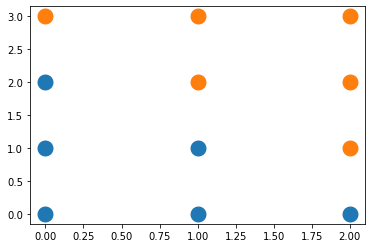

In [4]:
#Generate scatter plot of X
uq = np.unique(X[:,-1])
for i in uq:
    cl1 = X[X[:,-1]==i]
    plt.scatter(cl1[:,0], cl1[:,1],linewidth=10)

In [5]:
# Generate X by concatinating ones and X
X=[]
Y=[]
for x1,x2,y in Xb:
    X.append([1,x1,x2])
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
print(X,Y)

[[1 0 0]
 [1 0 1]
 [1 0 2]
 [1 0 3]
 [1 1 0]
 [1 1 1]
 [1 1 2]
 [1 1 3]
 [1 2 0]
 [1 2 1]
 [1 2 2]
 [1 2 3]] [0 0 0 1 0 0 1 1 0 1 1 1]


In [8]:
#write code for gradient descent to find thetas
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def hx(w,X):
    z=np.array(w[0]*np.array(X[:,0])+w[1]*np.array(X[:,1])+w[2]*np.array(X[:,2]))
    return sigmoid(z)
    
def grad(w,X,Y):
    y_pred=hx(w,X)
    y_pred=np.array([1 if p >= 0.5 else 0 for p in y_pred])
    g=[0]*X.shape[1]
    for i in range(X.shape[1]):
        g[i]=-1*np.sum(Y*(1-y_pred)*X[:,i]-(1-Y)*y_pred*X[:,i])
    return g

def descent(w_new,w_prev,lr):
    epochs=0
    while True:
        w_prev=w_new
        g=grad(w_prev,X,Y)
        w0=w_prev[0]-lr*g[0]
        w1=w_prev[1]-lr*g[1]
        w2=w_prev[2]-lr*g[2]
        w_new=[w0,w1,w2]
        if (w_new[0]-w_prev[0])**2+(w_new[1]-w_prev[1])**2+(w_new[2]-w_prev[2])**2<pow(10,-6):
            return w_new
        
        if epochs>100:
            return w_new
        epochs+=1

w=[1,1,1]
w=descent(w,w,0.009)
print("Thethas", w)

Thethas [-0.26000000000000034, 0.11799999999999974, 0.11799999999999974]


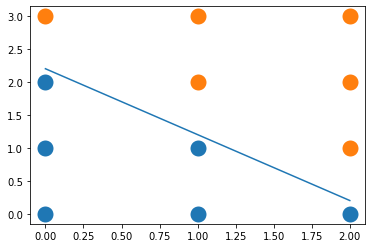

In [9]:
uq = np.unique(X[:,-1])
for i in uq:
    cl1 = Xb[Xb[:,-1]==i]
    plt.scatter(cl1[:,0], cl1[:,1],linewidth=10)
    
x=np.linspace(0,2,10)
y=(-w[0]-w[1]*x)/w[2]
plt.plot(x,y)